In [36]:
import pandas as pd
import numpy as np

# Зчитуємо таблиці з сайту за каласом
tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8", attrs={"class": "wikitable collapsible collapsed"})

# нам потрібна третя
db = tmp[3]

print(db)


               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [50]:
# Перші рядки таблиці за допомогою методу head
print(tmp[3].head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [51]:
# Кількість рядків та стовпців у датафреймі (атрибут shape)
print(db.shape)

(28, 9)


In [52]:
# Замінюємо у таблиці значення "—" на значення NaN
db.replace("—", np.nan, inplace=True)
print(data)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [53]:
# Типи всіх стовпців за допомогою dataframe.dtypes
print(db.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [54]:
# Замінюємо типи нечислових колонок на числові
db = db.apply(pd.to_numeric, errors='ignore')
print(db.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


C:\Users\WorkPC\AppData\Local\Temp\ipykernel_23132\3265693888.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  db = db.apply(pd.to_numeric, errors='ignore')


In [55]:
# яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_values = db.isnull().sum() / len(db)
print(missing_values)


Регіон    0.000000
1950      0.000000
1960      0.000000
1970      0.000000
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [ ]:
# Замінюємо відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
for column in db.columns[1:]:
    db[column].fillna(db[column].mean())

print(db)

In [ ]:
# Отримуємо список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
regions_above_avg = db[db['2019'] > db['2019'].mean()]
print(regions_above_avg['Регіон'])

In [63]:
# У якому регіоні була найвища народжуваність у 2014 році
max_birth_rate_2014 = db['2014'].idxmax()
print(db.loc[max_birth_rate_2014, 'Регіон'])

Рівненська


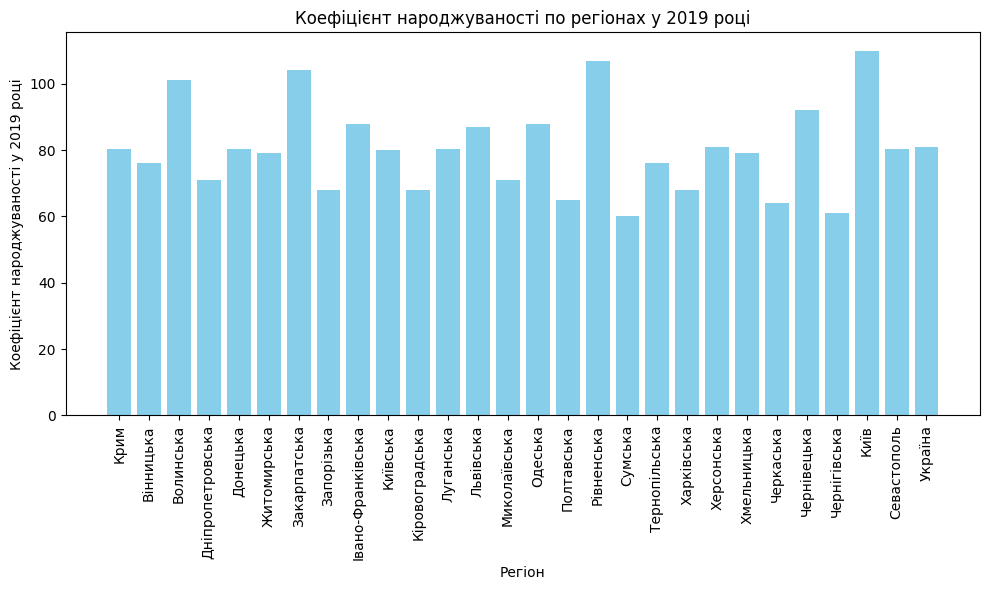

In [64]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(db['Регіон'], db['2019'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності у 2019 році')
plt.title('Коефіцієнт народжуваності по регіонах у 2019 році')
plt.tight_layout()
plt.show()
